In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/17-18-spring-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/17-18-spring-ta.xlsx") # TA preference list

In [4]:
course_n_rows, course_n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(course_n_rows, course_n_columns))

Shape of course dataframe is
number of rows: 114, number of columns: 9


In [5]:
n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 295, number of columns: 11


## Brief preview of both TA and Course preference lists

In [6]:
Course_df.head(114)

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,20360.0,BIO 301,0,Intro. to Molecular Biology,NaN,30.0,25.0,1-Yunus Akkoc ( 69894 ) (10 / 10)\n1-Biran Mus...,"Yunus Akkoc (69894, BIO, 10 hours)\nFrancesko ..."
2,20362.0,BIO 303,0,Genetics,NaN,40.0,20.0,1-Ronay Cetin ( 69880 ) (10 / 10)\n1-Liyne Nog...,"Ronay Cetin (69880, BIO, 10 hours)\nLiyne Noga..."
3,20364.0,BIO 304,0,Biological Func.&Structure,NaN,10.0,10.0,1-Kadriye Kahraman ( 69494 ) (10 / 10)\n1-Sofi...,"Sofia Piepoli (69646, BIO, 10 hours)"
4,20365.0,BIO 308,0,Plant Physiology,NaN,10.0,15.0,3-Sezgi Biyiklioglu ( 69040 ) (10 / 10)\n4-Fat...,"Raheela Rehman (69398, BIO, 10 hours)"
5,20369.0,BIO 310,0,Introduction To Bioinformatics,NaN,20.0,15.0,1-Tandac Furkan Guclu ( 69160 ) (10 / 10)\n1-H...,"Tandac Furkan Guclu (69160, BIO, 10 hours)\nHa..."
6,20367.0,BIO 322,0,Biochemistry II,NaN,30.0,20.0,1-Sinem Usluer ( 69618 ) (10 / 10)\n1-Sevde Nu...,"Sevde Nur Karatas (69620, BIO, 20 hours)\nSine..."
7,20372.0,BIO 335,0,Analytical Techniques,NaN,20.0,20.0,1-Humeyra Nur Kaleli ( 69428 ) (10 / 10)\n1-Eb...,"Ebru Ozer (69332, BIO, 10 hours)\nNazife Tolay..."
8,21345.0,BIO 467,0,Signal Transduction,NaN,0.0,5.0,1-Melike Gezen ( 69730 ) (10 / 10)\n1-Nazife T...,None
9,20376.0,CHEM 202,0,Kinetics of Materials,NaN,40.0,20.0,2-Muhammad Faisal Jamil ( 69150 ) (20 / 20)\n3...,"Muhammad Faisal Jamil (69150, MAT, 20 hours)\n..."


In [7]:
TA_df.head(295)

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,1- ME 309 (20 / 25)\n2- MATH 101 (150 / 135)\n...,MATH 102,20900.0,NaN,NaN
1,24375,Abdul Rahman \nDabbour,MS,ME,20,20,1- MATH 203 (90 / 125)\n2- NS 208 (30 / 50)\n3...,MATH 203,20621.0,NaN,NaN
2,16440,Abdulkadir \nUzun,MS,EE,20,20,NaN,EE 406,20455.0,\nMATH 102,20900.0
3,14277,Abdurrahman \nBurak,PHD,EE,10,10,1- EE 308 (20 / 20)\n2- ENS 201 (20 / 25)\n3- ...,EE 200,20436.0,NaN,NaN
4,20205,Adnan \nTaşdemir,PHD,MAT,10,10,1- MAT 204 (10 / 15)\n2- MAT 206 (30 / 15)\n3-...,MAT 206,20585.0,NaN,NaN
5,22232,Afrim \nBojnik,MS,MATH,20,20,NaN,MATH 204,20639.0,NaN,NaN
6,21965,Ahmad Reza\nMotezakker,MS,ME,10,10,1- ME 302 (30 / 60)\n2- ME 309 (20 / 25)\n3- M...,ME 302,20678.0,NaN,NaN
7,13953,Ahmet Can\nMert,PHD,EE,30,30,1- CS 401 (15 / 35)\n2- EE 310 (10 / 20)\n3- E...,MATH 204,20639.0,NaN,NaN
8,21969,Ahmet Deniz\nBenli,MS,MAT,15,15,NaN,MAT 308,21477.0,NaN,NaN
9,10613,Ahmet Selim\nPehlivan,PHD,ME,10,10,1- ENS 209 (150 / 67),ENS 209,20496.0,NaN,NaN


## Data types for TA & Courses dataframes

In [8]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

In [9]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

## Dealing with Dirty Data¶

In [10]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expected
TA_df['Name'] = TA_df['Name'].replace('\n',' ', regex=True)
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', regex=True)

In [11]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,18282,Abdolali Khalili Sadaghiani,PHD,ME,20,20,1- ME 309 (20 / 25)\n2- MATH 101 (150 / 135)\n...,MATH 102,20900,0,0
1,24375,Abdul Rahman Dabbour,MS,ME,20,20,1- MATH 203 (90 / 125)\n2- NS 208 (30 / 50)\n3...,MATH 203,20621,0,0
2,16440,Abdulkadir Uzun,MS,EE,20,20,0,EE 406,20455,MATH 102,20900
3,14277,Abdurrahman Burak,PHD,EE,10,10,1- EE 308 (20 / 20)\n2- ENS 201 (20 / 25)\n3- ...,EE 200,20436,0,0
4,20205,Adnan Taşdemir,PHD,MAT,10,10,1- MAT 204 (10 / 15)\n2- MAT 206 (30 / 15)\n3-...,MAT 206,20585,0,0


In [12]:
# Course dataframes turn
Course_df = Course_df.fillna(0) # replace all NaN values with 0
Course_df = Course_df.drop(Course_df.index[0])
Course_df['CRN'] = Course_df['CRN'].astype('int64')
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,20360,BIO 301,0,Intro. to Molecular Biology,0,30,25,1-Yunus Akkoc ( 69894 ) (10 / 10)\n1-Biran Mus...,"Yunus Akkoc (69894, BIO, 10 hours)\nFrancesko ..."
2,20362,BIO 303,0,Genetics,0,40,20,1-Ronay Cetin ( 69880 ) (10 / 10)\n1-Liyne Nog...,"Ronay Cetin (69880, BIO, 10 hours)\nLiyne Noga..."
3,20364,BIO 304,0,Biological Func.&Structure,0,10,10,1-Kadriye Kahraman ( 69494 ) (10 / 10)\n1-Sofi...,"Sofia Piepoli (69646, BIO, 10 hours)"
4,20365,BIO 308,0,Plant Physiology,0,10,15,3-Sezgi Biyiklioglu ( 69040 ) (10 / 10)\n4-Fat...,"Raheela Rehman (69398, BIO, 10 hours)"
5,20369,BIO 310,0,Introduction To Bioinformatics,0,20,15,1-Tandac Furkan Guclu ( 69160 ) (10 / 10)\n1-H...,"Tandac Furkan Guclu (69160, BIO, 10 hours)\nHa..."


## How many TA's requested for each course ?

In [18]:
for courses in range(1,course_n_rows) :
    data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines() 
    print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

BIO 301 requested 6 TA's
BIO 303 requested 12 TA's
BIO 304 requested 6 TA's
BIO 308 requested 2 TA's
BIO 310 requested 5 TA's
BIO 322 requested 3 TA's
BIO 335 requested 8 TA's
BIO 467 requested 10 TA's
CHEM 202 requested 2 TA's
CHEM 302 requested 7 TA's
CS 100 requested 7 TA's
CS 201 requested 26 TA's
CS 204 requested 10 TA's
CS 210 requested 7 TA's
CS 301 requested 12 TA's
CS 305 requested 4 TA's
CS 306 requested 3 TA's
CS 308 requested 3 TA's
CS 310 requested 11 TA's
CS 400 requested 2 TA's
CS 401 requested 7 TA's
CS 403 requested 2 TA's
CS 404 requested 2 TA's
CS 407 requested 1 TA's
CS 409 requested 2 TA's
CS 450 requested 2 TA's
EE 200 requested 6 TA's
EE 202 requested 5 TA's
EE 302 requested 5 TA's
EE 306 requested 3 TA's
EE 308 requested 4 TA's
EE 310 requested 4 TA's
EE 312 requested 3 TA's
EE 314 requested 1 TA's
EE 402 requested 1 TA's
EE 404 requested 2 TA's
EE 406 requested 2 TA's
EE 410 requested 1 TA's
ENS 201 requested 9 TA's
ENS 205 requested 21 TA's
ENS 206 requested 8

In [19]:
for TA in range(1,course_n_rows) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

BIO 301 assigned 3 TA's
BIO 303 assigned 3 TA's
BIO 304 assigned 1 TA's
BIO 308 assigned 1 TA's
BIO 310 assigned 2 TA's
BIO 322 assigned 2 TA's
BIO 335 assigned 2 TA's
BIO 467 assigned 0 TA's
CHEM 202 assigned 2 TA's
CHEM 302 assigned 2 TA's
CS 100 assigned 1 TA's
CS 201 assigned 13 TA's
CS 204 assigned 4 TA's
CS 210 assigned 2 TA's
CS 301 assigned 1 TA's
CS 305 assigned 1 TA's
CS 306 assigned 2 TA's
CS 308 assigned 3 TA's
CS 310 assigned 2 TA's
CS 400 assigned 1 TA's
CS 401 assigned 1 TA's
CS 403 assigned 1 TA's
CS 404 assigned 1 TA's
CS 407 assigned 1 TA's
CS 409 assigned 1 TA's
CS 450 assigned 0 TA's
EE 200 assigned 4 TA's
EE 202 assigned 2 TA's
EE 302 assigned 1 TA's
EE 306 assigned 0 TA's
EE 308 assigned 1 TA's
EE 310 assigned 1 TA's
EE 312 assigned 2 TA's
EE 314 assigned 2 TA's
EE 402 assigned 1 TA's
EE 404 assigned 1 TA's
EE 406 assigned 1 TA's
EE 410 assigned 1 TA's
ENS 201 assigned 2 TA's
ENS 205 assigned 12 TA's
ENS 206 assigned 4 TA's
ENS 208 assigned 5 TA's
ENS 209 assigned

## Number of Ta's for each program

In [15]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT     58
BIO     40
ME      39
CS      37
EE      34
IE      34
MFE     25
MATH    15
PHYS    12
ETM      1
Name: Program, dtype: int64


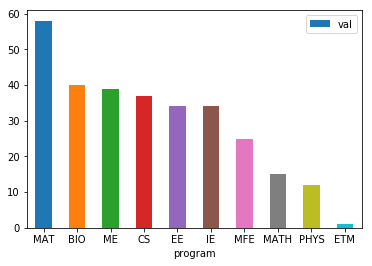

In [17]:
df = pd.DataFrame({'program':['MAT', 'BIO', 'ME','CS','EE','IE','MFE','MATH','PHYS','ETM'], 'val':[58, 40, 39,37,34,34,25,15,12,1]})
ax = df.plot.bar(x='program', y='val', rot=0)